## 《数据分析与经济决策》第一次小组作业
8组：  
谢有春：24210175  
郭恩瑜：24210125    
赵晓燕：24210190    
李烨豪：24210142    
廖礼杨：24210145  
傅烨豪：24210123    
谭敏彬：24210160    
罗锐：24210154  
魏晓锐：24210167    


## T3：中国上市公司数量年度统计   
作业描述：  
编写一个 Python 脚本，自动下载中国股票市场的概览数据，并进行简单的统计分析和可视化。

In [1]:
import requests
import pandas as pd
import json,time,os,re
import random


## T3-1.1：下载深交所数据
数据来源：https://www.szse.cn/market/stock/indicator/index.html

In [2]:
def getSZ(idx,tabName):
    for year in range(2008,2026):
        if (year > 2021 and tabName == '中小板') or (tabName == '主板' and year==2008) or (tabName == '创业板' and year in [2008,2009]):
            continue
        if not os.path.exists(f'./上市公司总数/深圳_{tabName}_{year}.json'):
            url = f"https://www.szse.cn/api/report/ShowReport/data?SHOWTYPE=JSON&CATALOGID=1803_after&TABKEY=tab{idx}&txtQueryDate={year}-04-26&random={random.random()}"
            headers = {
            "Accept": "application/json, text/javascript, */*; q=0.01",
            "Accept-Encoding": "gzip, deflate, br, zstd",
            "Accept-Language": "zh-CN,zh;q=0.9,en-US;q=0.8,en;q=0.7",
            "Cache-Control": "no-cache",
            "Content-Type": "application/json",
            "Host": "www.szse.cn",
            "Pragma": "no-cache",
            "Referer": "https://www.szse.cn/market/stock/indicator/index.html",
            "Sec-Fetch-Dest": "empty",
            "Sec-Fetch-Mode": "cors",
            "Sec-Fetch-Site": "same-origin",
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36",
            "X-Request-Type": "ajax",
            "X-Requested-With": "XMLHttpRequest",
            "sec-ch-ua": "\"Chromium\";v=\"136\", \"Google Chrome\";v=\"136\", \"Not.A/Brand\";v=\"99\"",
            "sec-ch-ua-mobile": "?0",
            "sec-ch-ua-platform": "Windows"
            }
            response = requests.get(url,headers=headers).json()
            with open(f'./上市公司总数/深圳_{tabName}_{year}.json','w',encoding='utf-8') as f:
                json.dump(response,f,indent=4,ensure_ascii=False)
            print(f'./上市公司总数/深圳_{tabName}_{year}.json done..')
        else:
            print(f'./上市公司总数/深圳_{tabName}_{year}.json existed..')

In [3]:
getSZ(2,"主板")
getSZ(3,'中小板')
getSZ(4,"创业板")

./上市公司总数/深圳_主板_2009.json existed..
./上市公司总数/深圳_主板_2010.json existed..
./上市公司总数/深圳_主板_2011.json existed..
./上市公司总数/深圳_主板_2012.json existed..
./上市公司总数/深圳_主板_2013.json existed..
./上市公司总数/深圳_主板_2014.json existed..
./上市公司总数/深圳_主板_2015.json existed..
./上市公司总数/深圳_主板_2016.json existed..
./上市公司总数/深圳_主板_2017.json existed..
./上市公司总数/深圳_主板_2018.json existed..
./上市公司总数/深圳_主板_2019.json existed..
./上市公司总数/深圳_主板_2020.json existed..
./上市公司总数/深圳_主板_2021.json existed..
./上市公司总数/深圳_主板_2022.json existed..
./上市公司总数/深圳_主板_2023.json existed..
./上市公司总数/深圳_主板_2024.json existed..
./上市公司总数/深圳_主板_2025.json existed..
./上市公司总数/深圳_中小板_2008.json existed..
./上市公司总数/深圳_中小板_2009.json existed..
./上市公司总数/深圳_中小板_2010.json existed..
./上市公司总数/深圳_中小板_2011.json existed..
./上市公司总数/深圳_中小板_2012.json existed..
./上市公司总数/深圳_中小板_2013.json existed..
./上市公司总数/深圳_中小板_2014.json existed..
./上市公司总数/深圳_中小板_2015.json existed..
./上市公司总数/深圳_中小板_2016.json existed..
./上市公司总数/深圳_中小板_2017.json existed..
./上市公司总数/深圳_中小板_2018.json existed..
./上市公司总数/

## T3-1.2：下载上交所数据
数据来源：https://www.sse.com.cn/market/view/

In [4]:
def getSH():
    for year in range(1999,2026):
        if not os.path.exists(f'./上市公司总数/上海_{year}.json'):
            url = f"https://query.sse.com.cn/commonQuery.do?jsonCallBack=jsonpCallback9178123{random.randint(1,9)}&isPagination=false&sqlId=COMMON_SSE_SJ_SCGM_C&TRADE_DATE={year}-04-01&_={int(time.time()*1000)}"
            headers = {
                "accept": "*/*",
                "accept-encoding": "gzip, deflate, br, zstd",
                "accept-language": "zh-CN,zh;q=0.9,en-US;q=0.8,en;q=0.7",
                "cache-control": "no-cache",
                "connection": "keep-alive",
                "cookie": "gdp_user_id=gioenc-7ad16db8%2Cab74%2C567c%2C894g%2C49dg262gc899; ba17301551dcbaf9_gdp_session_id=7afc67b1-5607-46e3-b50c-d467c7a2f80b; ba17301551dcbaf9_gdp_session_id_sent=7afc67b1-5607-46e3-b50c-d467c7a2f80b; ba17301551dcbaf9_gdp_sequence_ids={%22globalKey%22:80%2C%22VISIT%22:3%2C%22PAGE%22:11%2C%22VIEW_CLICK%22:68}",
                "host": "query.sse.com.cn",
                "pragma": "no-cache",
                "referer": "https://www.sse.com.cn/",
                "sec-ch-ua": "\"Chromium\";v=\"136\", \"Google Chrome\";v=\"136\", \"Not.A/Brand\";v=\"99\"",
                "sec-ch-ua-mobile": "?0",
                "sec-ch-ua-platform": "Windows",
                "sec-fetch-dest": "script",
                "sec-fetch-mode": "no-cors",
                "sec-fetch-site": "same-site",
                "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36"
            }
            response = requests.get(url,headers=headers).text
            res = json.loads(re.findall("\((\{.*})\)",response)[0])
            with open(f'./上市公司总数/上海_{year}.json','w',encoding='utf-8') as f:
                json.dump(res,f,indent=4,ensure_ascii=False)
            print(f'./上市公司总数/上海_{year}.json done..')
        else:
            print(f'./上市公司总数/上海_{year}.json existed..')

<>:24: SyntaxWarning: invalid escape sequence '\('
<>:24: SyntaxWarning: invalid escape sequence '\('
C:\Users\xiaor\AppData\Local\Temp\ipykernel_4016\1144392208.py:24: SyntaxWarning: invalid escape sequence '\('
  res = json.loads(re.findall("\((\{.*})\)",response)[0])


In [5]:
getSH()

./上市公司总数/上海_1999.json existed..
./上市公司总数/上海_2000.json existed..
./上市公司总数/上海_2001.json existed..
./上市公司总数/上海_2002.json existed..
./上市公司总数/上海_2003.json existed..
./上市公司总数/上海_2004.json existed..
./上市公司总数/上海_2005.json existed..
./上市公司总数/上海_2006.json existed..
./上市公司总数/上海_2007.json existed..
./上市公司总数/上海_2008.json existed..
./上市公司总数/上海_2009.json existed..
./上市公司总数/上海_2010.json existed..
./上市公司总数/上海_2011.json existed..
./上市公司总数/上海_2012.json existed..
./上市公司总数/上海_2013.json existed..
./上市公司总数/上海_2014.json existed..
./上市公司总数/上海_2015.json existed..
./上市公司总数/上海_2016.json existed..
./上市公司总数/上海_2017.json existed..
./上市公司总数/上海_2018.json existed..
./上市公司总数/上海_2019.json existed..
./上市公司总数/上海_2020.json existed..
./上市公司总数/上海_2021.json existed..
./上市公司总数/上海_2022.json existed..
./上市公司总数/上海_2023.json existed..
./上市公司总数/上海_2024.json existed..
./上市公司总数/上海_2025.json existed..


## T3-1.3：下载北交所数据
数据来源：https://www.bse.cn/static/statisticdata.html

In [6]:
def getBJ():
    for year in range(2022,2026):
        if not os.path.exists(f'./上市公司总数/北交所_{year}.json'):
            url = "https://www.bse.cn/marketStatController/dailyReport.do?callback=jQuery331_1748198810903"
            headers = {
                "Accept": "text/javascript, application/javascript, application/ecmascript, application/x-ecmascript, */*; q=0.01",
                "Accept-Encoding": "gzip, deflate, br, zstd",
                "Accept-Language": "zh-CN,zh;q=0.9,en-US;q=0.8,en;q=0.7",
                "Cache-Control": "no-cache",
                "Connection": "keep-alive",
                "Content-Length": "15",
                "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
                "Cookie": "Hm_lvt_ef6193a308904a92936b38108b93bd7f=1748198764; HMACCOUNT=22BC53625476F081; Hm_lpvt_ef6193a308904a92936b38108b93bd7f=1748198811; C3VK=ae7d82",
                "Host": "www.bse.cn",
                "Origin": "https://www.bse.cn",
                "Pragma": "no-cache",
                "Referer": "https://www.bse.cn/static/statisticdata.html",
                "Sec-Fetch-Dest": "empty",
                "Sec-Fetch-Mode": "cors",
                "Sec-Fetch-Site": "same-origin",
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36",
                "X-Requested-With": "XMLHttpRequest",
                "sec-ch-ua": "\"Chromium\";v=\"136\", \"Google Chrome\";v=\"136\", \"Not.A/Brand\";v=\"99\"",
                "sec-ch-ua-mobile": "?0",
                "sec-ch-ua-platform": "Windows"
            }
            payload = {
                'HQJSRQ': f"{year}0523"
            }
            response = requests.post(url,headers=headers,data=payload).text
            res = json.loads(re.findall('\((.*)\)',response)[0])
            with open(f'./上市公司总数/北交所_{year}.json','w',encoding='utf-8') as f:
                json.dump(res,f,indent=4,ensure_ascii=False)
            print(f'./上市公司总数/北交所_{year}.json done..')
        else:
            print(f'./上市公司总数/北交所_{year}.json existed..')

<>:31: SyntaxWarning: invalid escape sequence '\('
<>:31: SyntaxWarning: invalid escape sequence '\('
C:\Users\xiaor\AppData\Local\Temp\ipykernel_4016\1700096796.py:31: SyntaxWarning: invalid escape sequence '\('
  res = json.loads(re.findall('\((.*)\)',response)[0])


In [7]:
getBJ()

./上市公司总数/北交所_2022.json existed..
./上市公司总数/北交所_2023.json existed..
./上市公司总数/北交所_2024.json existed..
./上市公司总数/北交所_2025.json existed..


## T3-2.1：上市公司数量统计和可视化

In [8]:
datalist = []
files = os.listdir('上市公司总数')
for file in files:
    if file.startswith('.'):
        continue
    with open(f'./上市公司总数/{file}','r',encoding='utf-8') as f:
        obj = json.load(f)
    year = file.split('_')[-1].split('.')[0]
    if file.startswith('深圳'):
        tabName = file.split('_')[1]
        if tabName == '主板':
            num = obj[1]["data"][1]["today"].replace(',','')
        elif tabName == '中小板':
            num = obj[2]["data"][1]["today"].replace(',','')
        else:
            print(file)
            num = obj[-1]["data"][1]["today"].replace(',','')
        year = file.split('_')[2].split('.')[0]
        datalist.append(['深圳',year,tabName,num])
    elif file.startswith('上海'): 
        results = obj['result']
        for result in results:
            if result['PRODUCT_NAME'] in ['股票','主板A','主板B',"科创板"]:
                tabName = result['PRODUCT_NAME']
                num = result['SECURITY_NUM']
                datalist.append(['上海',year,tabName,num])
    elif file.startswith('北交所'):
        for item in obj:
            if item['xxzrlx'] == 'B':
                num = item['gpgsjs']
                datalist.append(['北交所',year,"股票数据",num])
df = pd.DataFrame(datalist,columns=['exchange','year','tab','num'])
# 数据类型转化
df['num'] = df['num'].apply(lambda x : int(float(x)))
df['year'] = df['year'].apply(lambda x : int(x))
df

深圳_创业板_2010.json
深圳_创业板_2011.json
深圳_创业板_2012.json
深圳_创业板_2013.json
深圳_创业板_2014.json
深圳_创业板_2015.json
深圳_创业板_2016.json
深圳_创业板_2017.json
深圳_创业板_2018.json
深圳_创业板_2019.json
深圳_创业板_2020.json
深圳_创业板_2021.json
深圳_创业板_2022.json
深圳_创业板_2023.json
深圳_创业板_2024.json
深圳_创业板_2025.json


,exchange,year,tab,num
0,上海,2019,股票,1508
1,上海,2019,主板A,1457
2,上海,2019,主板B,51
3,上海,2020,股票,1648
4,上海,2020,主板A,1504
...,...,...,...,...
69,深圳,2021,创业板,925
70,深圳,2022,创业板,1126
71,深圳,2023,创业板,1255
72,深圳,2024,创业板,1341


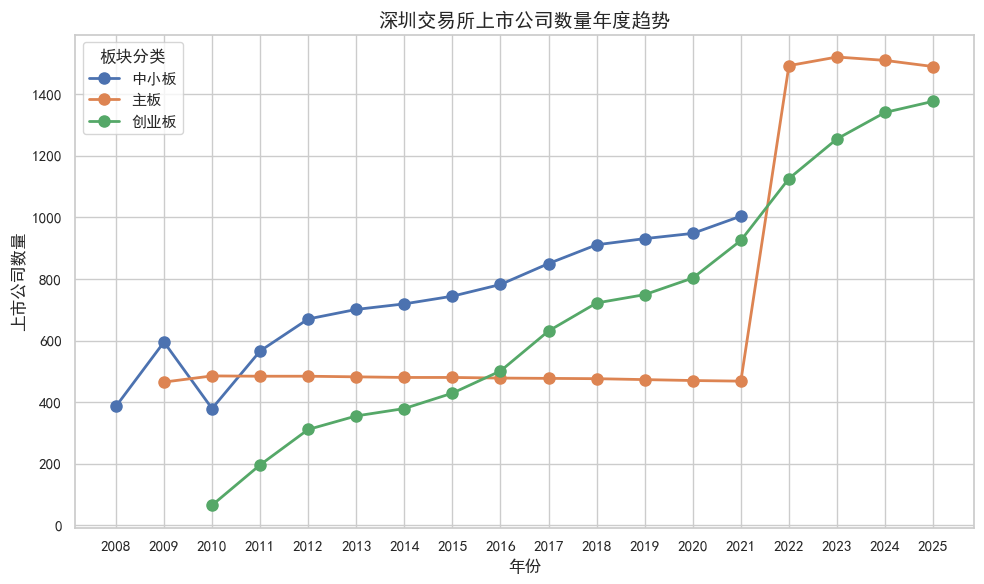

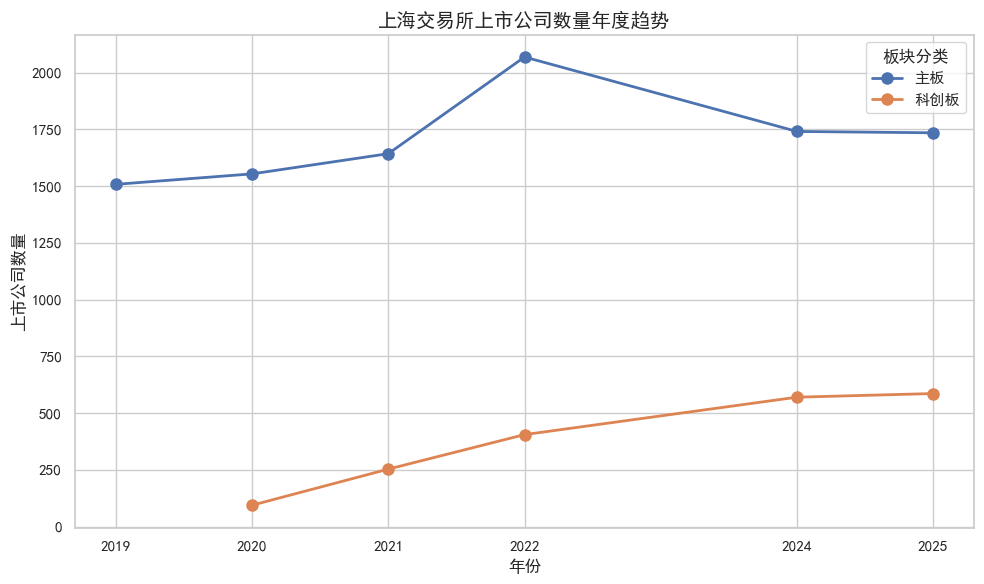

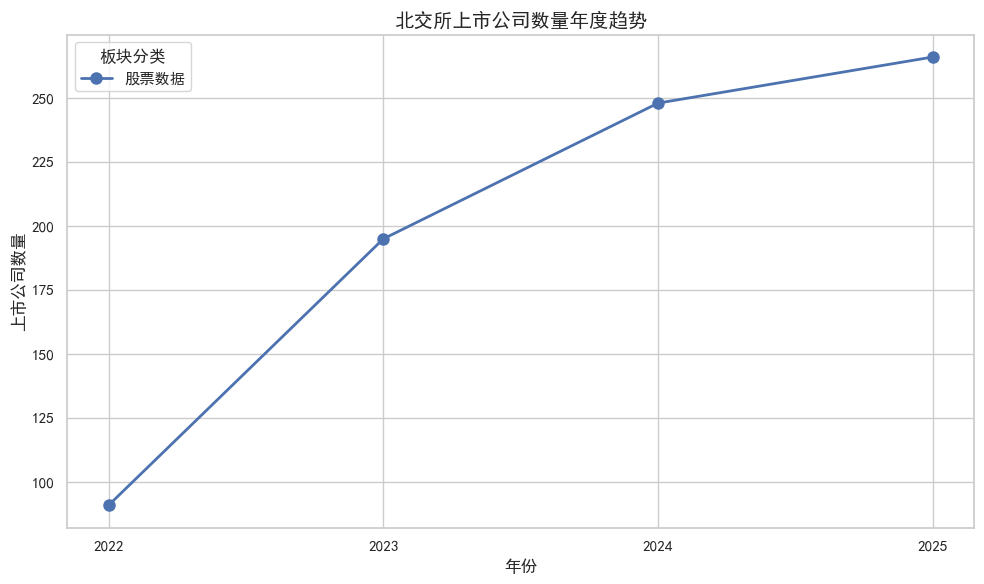

<Figure size 1000x600 with 0 Axes>

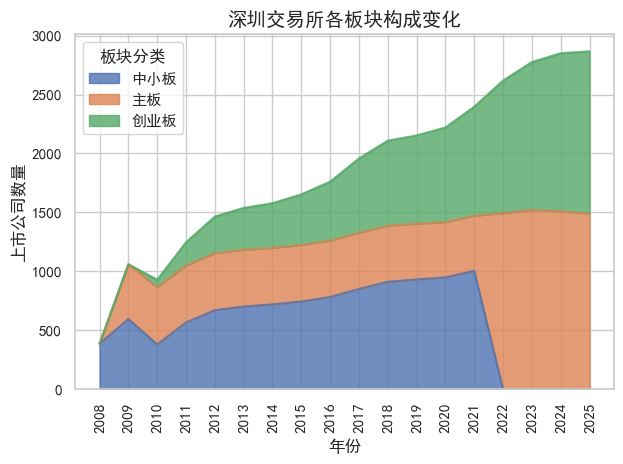

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置主题样式
sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 数据预处理
# 去除"股票"类别（保留具体板块数据）
df_clean = df[df['tab'] != '股票'].copy()

# 合并上海主板A/B
df_clean['tab'] = df_clean['tab'].replace({'主板A': '主板', '主板B': '主板'})

# 按交易所+年份+板块分组汇总
df_grouped = df_clean.groupby(['exchange', 'year', 'tab'])['num'].sum().reset_index()

# 定义通用绘图函数
def plot_exchange(data, exchange_name):
    plt.figure(figsize=(10, 6))
    tabs = data['tab'].unique()
    
    for tab in tabs:
        subset = data[data['tab'] == tab].sort_values('year')
        plt.plot(subset['year'], subset['num'], 
                 marker='o', linewidth=2, markersize=8, label=tab)
    
    plt.title(f'{exchange_name}上市公司数量年度趋势', fontsize=14)
    plt.xlabel('年份', fontsize=12)
    plt.ylabel('上市公司数量', fontsize=12)
    plt.xticks(data['year'].unique().astype(int))  # 确保年份显示为整数
    plt.legend(title='板块分类')
    plt.tight_layout()
    plt.show()

# 深圳交易所可视化
shenzhen = df_grouped[df_grouped['exchange'] == '深圳']
plot_exchange(shenzhen, '深圳交易所')

# 上海交易所可视化
shanghai = df_grouped[df_grouped['exchange'] == '上海']
plot_exchange(shanghai, '上海交易所')

# 北交所可视化
beijing = df_grouped[df_grouped['exchange'] == '北交所']
if not beijing.empty:
    plot_exchange(beijing, '北交所')
else:
    print("注意：数据中未发现北交所相关记录，请检查exchange字段取值")

# 绘制堆叠面积图展示板块构成
def plot_stacked_area(data, exchange_name):
    pivot_df = data.pivot(index='year', columns='tab', values='num')
    
    plt.figure(figsize=(10, 6))
    pivot_df.plot.area(alpha=0.8)
    plt.title(f'{exchange_name}各板块构成变化', fontsize=14)
    plt.xlabel('年份', fontsize=12)
    plt.ylabel('上市公司数量', fontsize=12)
    plt.xticks(pivot_df.index.astype(int),rotation=90)
    plt.legend(title='板块分类')
    plt.tight_layout()
    plt.show()

# 深圳堆叠图示例
plot_stacked_area(shenzhen, '深圳交易所')

## T3-2.2：上市公司行业统计和可视化

In [10]:
industry_sz = pd.read_excel('./行业统计/深交所.xlsx')
industry_sz

,行业名称,股票数(只),上市公司家数(家),成交金额(元),成交量,总股本,总市值,流通股本,流通市值,加权平均市盈率
0,农林牧渔,28,28,"4,715,280,155","640,771,376","40,377,151,255","480,608,116,065","33,081,444,905","369,143,762,611",10.71
1,采矿业,30,30,"7,672,063,953","612,281,828","38,474,148,544","392,151,988,819","34,353,538,996","357,163,745,453",18.20
2,制造业,2024,2002,"485,567,996,193","36,399,798,171","1,540,637,575,979","23,654,864,805,590","1,369,672,103,971","20,009,323,397,447",25.05
3,水电煤气,59,57,"10,279,143,219","1,632,011,368","132,627,286,520","796,073,997,457","120,381,549,032","713,494,957,000",17.66
4,建筑业,50,50,"5,357,910,454","947,148,251","47,368,260,771","255,287,412,558","41,279,688,070","211,442,048,995",18.50
5,批发零售,105,101,"23,452,636,642","2,322,976,292","96,356,747,614","804,449,557,356","84,504,462,269","685,012,882,272",31.90
6,运输仓储,35,33,"6,563,084,824","720,510,915","63,029,454,333","703,312,879,682","47,587,284,276","584,057,077,501",20.19
7,住宿餐饮,5,5,"432,109,758","88,316,816","2,963,975,442","16,892,145,678","2,829,937,533","15,918,261,694",155.03
8,信息技术,259,259,"84,163,334,553","5,664,368,326","179,907,540,355","2,537,915,807,464","159,689,970,075","2,106,785,861,257",51.07
9,金融业,37,37,"16,790,294,056","1,639,146,098","192,151,166,749","1,868,435,610,352","182,883,171,285","1,716,956,544,385",12.45


In [11]:
with open('./行业统计/上交所.json','r',encoding='utf-8') as f:
    obj = json.load(f)["result"]
industry_sh = pd.DataFrame(obj)
industry_sh['LIST_NUM'] = industry_sh['LIST_NUM'].astype(int)
industry_sh

,CSRC_CODE,TOTAL_VALUE,CSRC_NAME,AVG_PE_RATE,AVG_PRICE,TRADE_NUM,TRADE_DATE,LIST_NUM
0,A01,55820216450,农业,40.29,7.09,5,20250523,5
1,A03,33533941096,畜牧业,25.33,13.01,4,20250523,4
2,A04,7987420101,渔业,54.27,3.59,3,20250523,3
3,A05,5826978123,农、林、牧、渔专业及辅助性活动,56.85,7.26,2,20250523,2
4,B06,1349106007465,煤炭开采和洗选业,10.89,10.3,21,20250523,21
...,...,...,...,...,...,...,...,...
74,R86,226465130394,新闻和出版业,18.92,8.86,20,20250523,20
75,R87,67950094470,广播、电视、电影和录音制作业,142.02,7.45,8,20250523,8
76,R88,5906223500,文化艺术业,0.0,10.07,1,20250523,1
77,R89,7618533752,体育,121.34,7.99,1,20250523,1


In [12]:
industry_bj = pd.read_csv('./行业统计/北交所.csv')
industry_bj

,ts_code,symbol,name,area,industry,list_date
0,430017.BJ,430017,星昊医药,北京,化学制药,20230531
1,430047.BJ,430047,诺思兰德,北京,生物制药,20201124
2,430090.BJ,430090,同辉信息,北京,IT设备,20210809
3,430139.BJ,430139,华岭股份,上海,半导体,20221028
4,430198.BJ,430198,微创光电,湖北,IT设备,20200727
...,...,...,...,...,...,...
261,920445.BJ,920445,龙竹科技,福建,家居用品,20200727
262,920489.BJ,920489,佳先股份,安徽,化工原料,20200727
263,920682.BJ,920682,球冠电缆,浙江,电气设备,20200727
264,920799.BJ,920799,艾融软件,上海,软件服务,20200727



深圳交易所行业分布（前10+其他）:


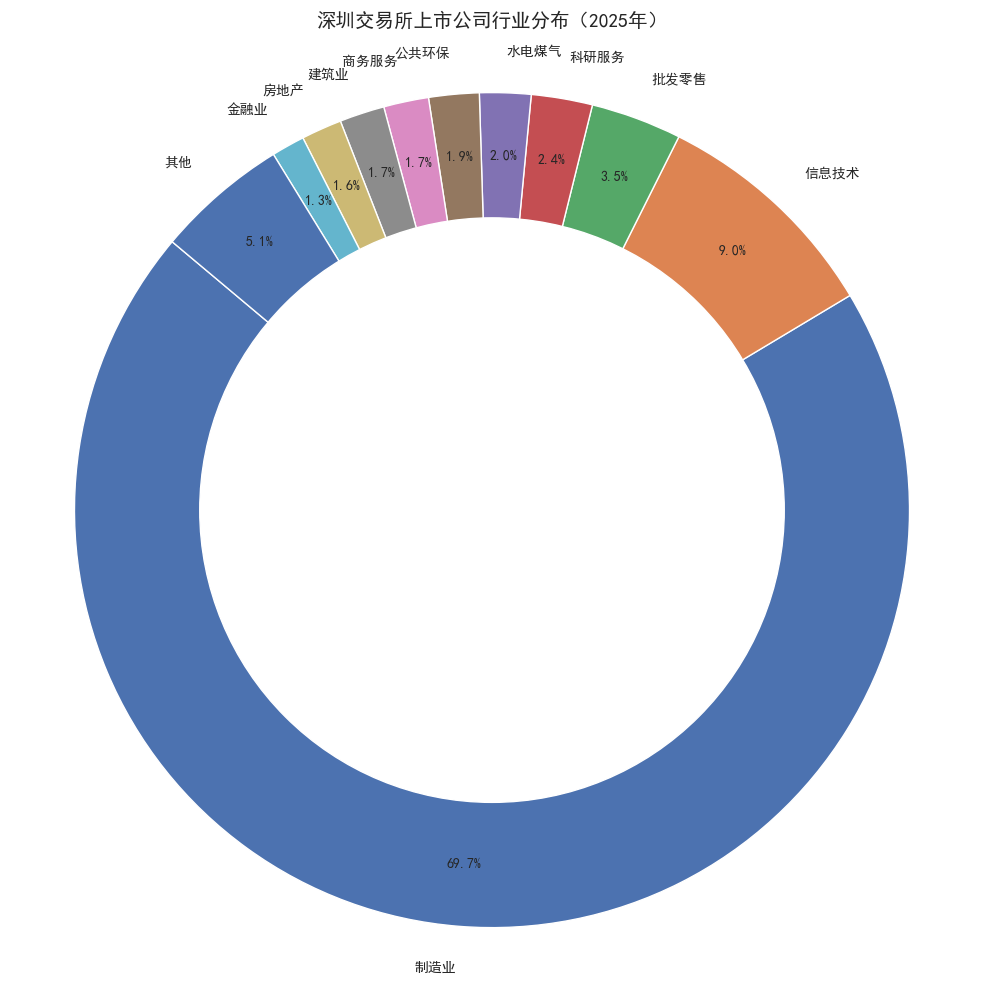


上海交易所行业分布（前10+其他）:


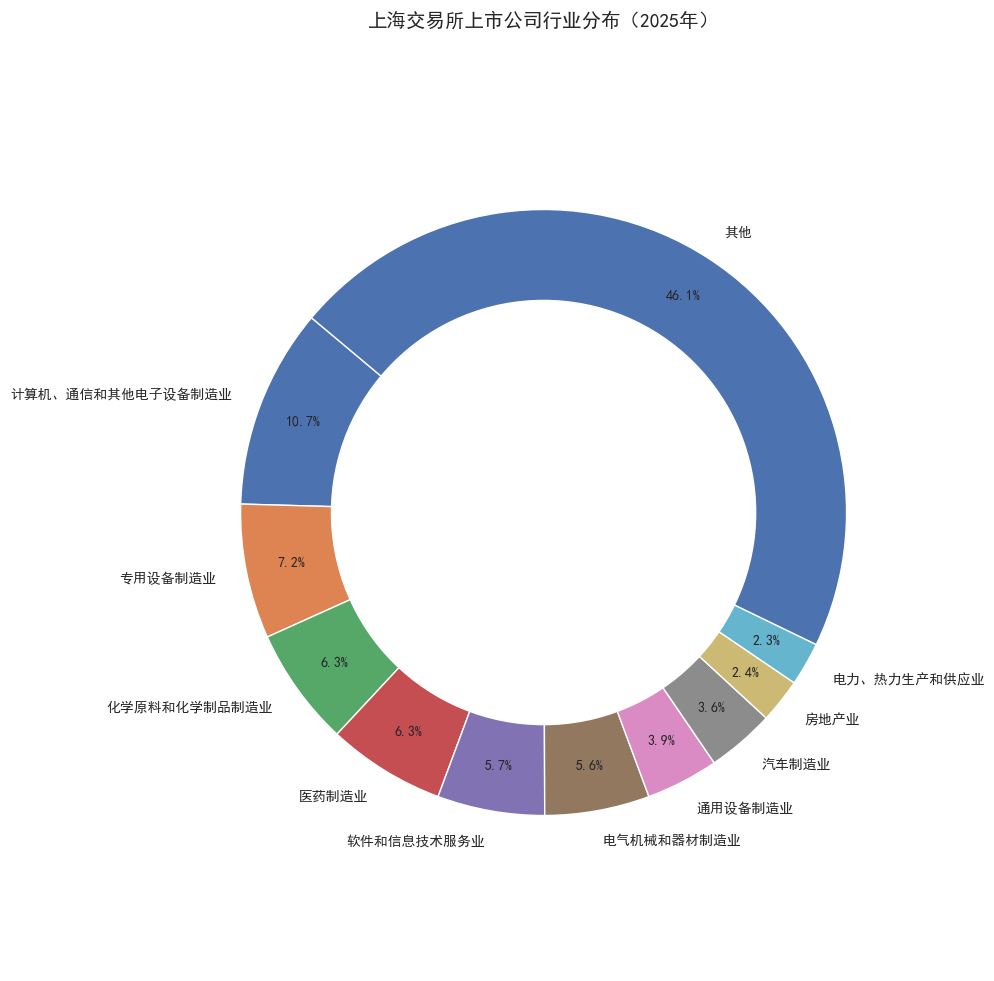


北交所行业分布（前10+其他）:


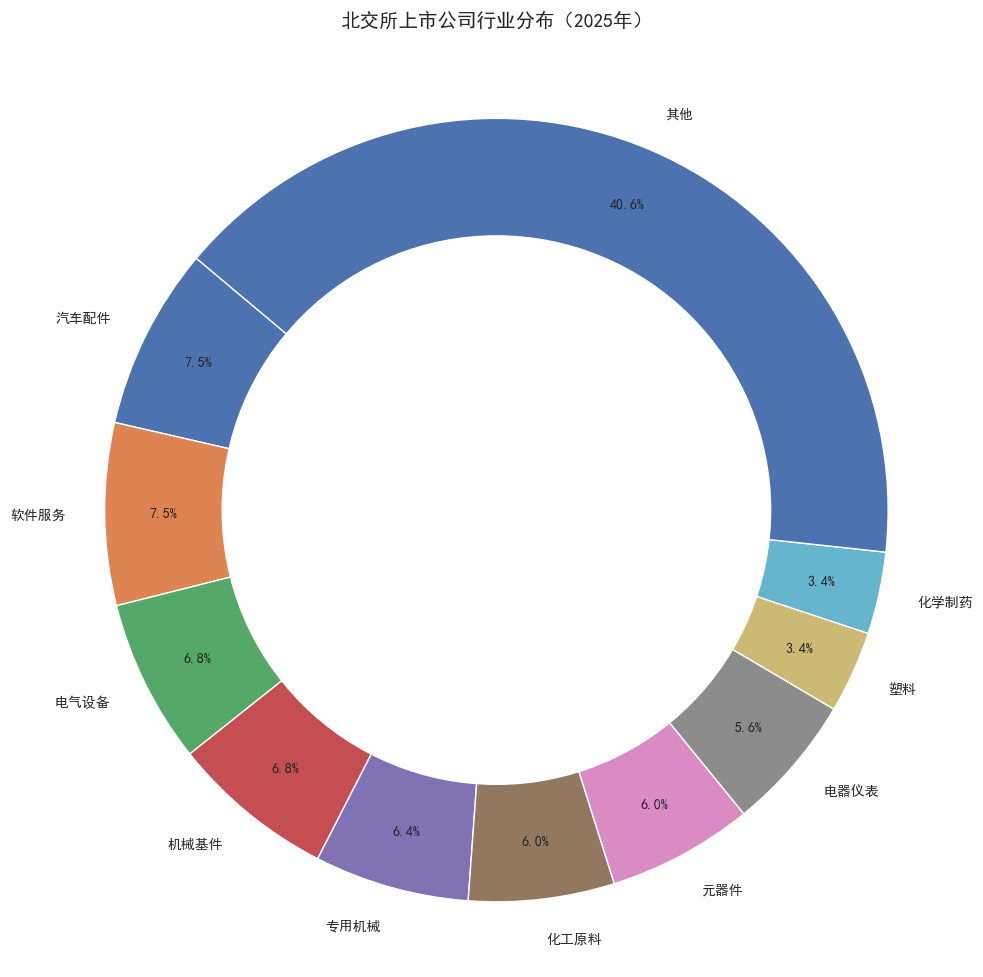


深圳前10+其他数据：
    行业名称  上市公司家数(家)
0    制造业       2002
1   信息技术        259
2   批发零售        101
3   科研服务         68
4   水电煤气         57
5   公共环保         56
6   商务服务         50
7    建筑业         50
8    房地产         45
9    金融业         37
10    其他        147

上海前10+其他数据：
                行业名称  公司数量
0   计算机、通信和其他电子设备制造业   248
1            专用设备制造业   167
2       化学原料和化学制品制造业   147
3              医药制造业   146
4         软件和信息技术服务业   133
5         电气机械和器材制造业   130
6            通用设备制造业    90
7              汽车制造业    84
8               房地产业    55
9        电力、热力生产和供应业    54
10                其他  1071

北交所前10+其他数据：
    行业名称  公司数量
0   汽车配件    20
1   软件服务    20
2   电气设备    18
3   机械基件    18
4   专用机械    17
5   化工原料    16
6    元器件    16
7   电器仪表    15
8     塑料     9
9   化学制药     9
10    其他   108
深圳交易所行业分布：


C:\Users\xiaor\AppData\Local\Temp\ipykernel_4016\1933422641.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.columns[0], x=data.columns[1], data=data, palette='viridis')


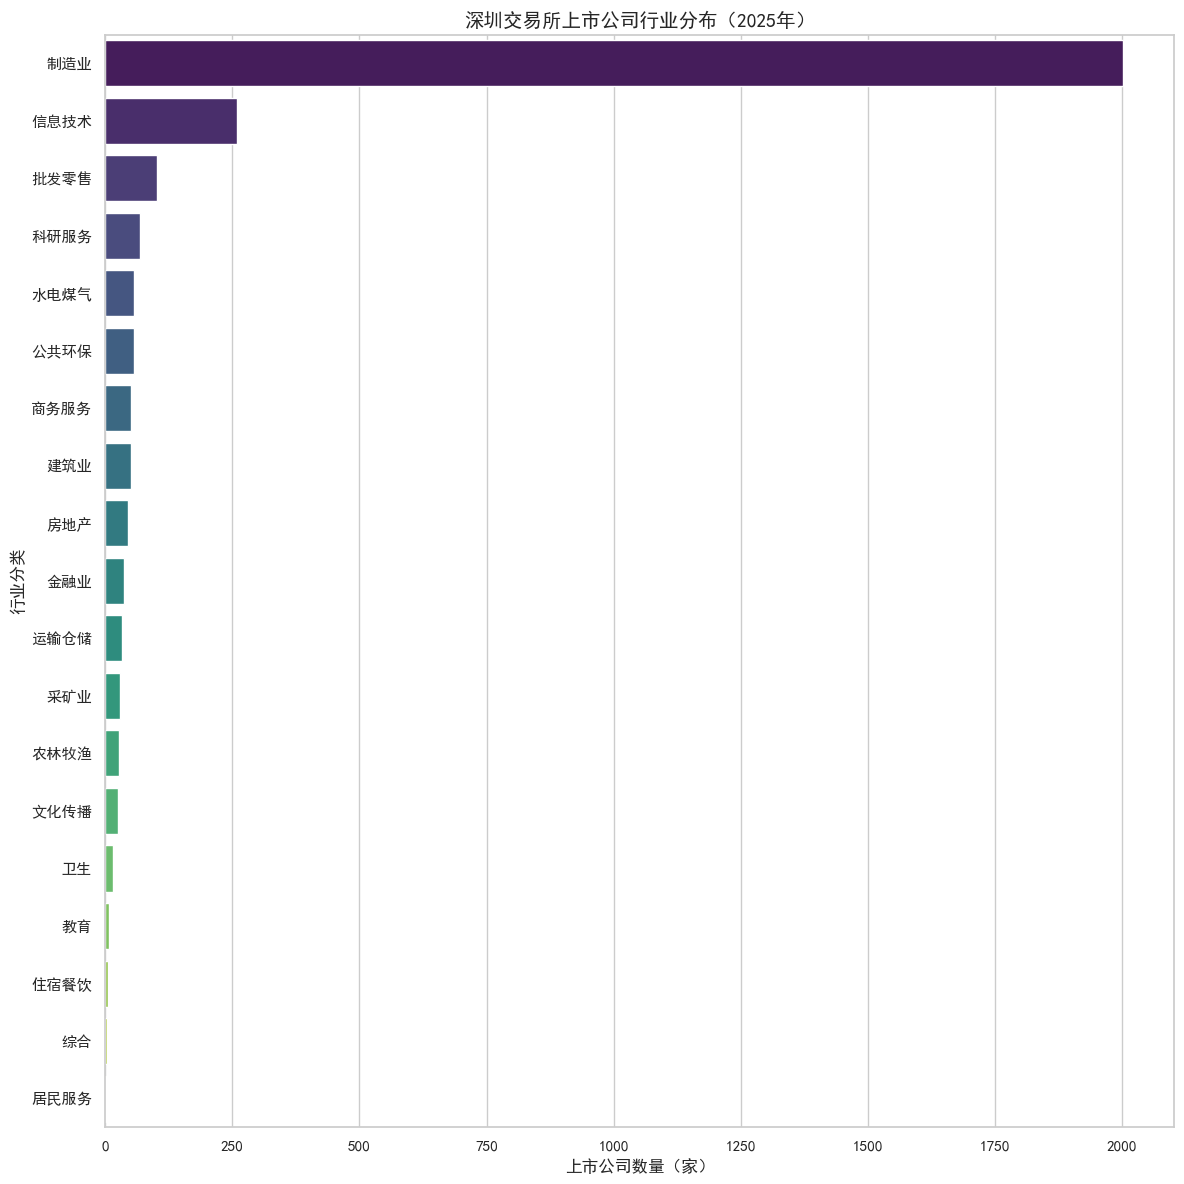


上海交易所行业分布：


C:\Users\xiaor\AppData\Local\Temp\ipykernel_4016\1933422641.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.columns[0], x=data.columns[1], data=data, palette='viridis')


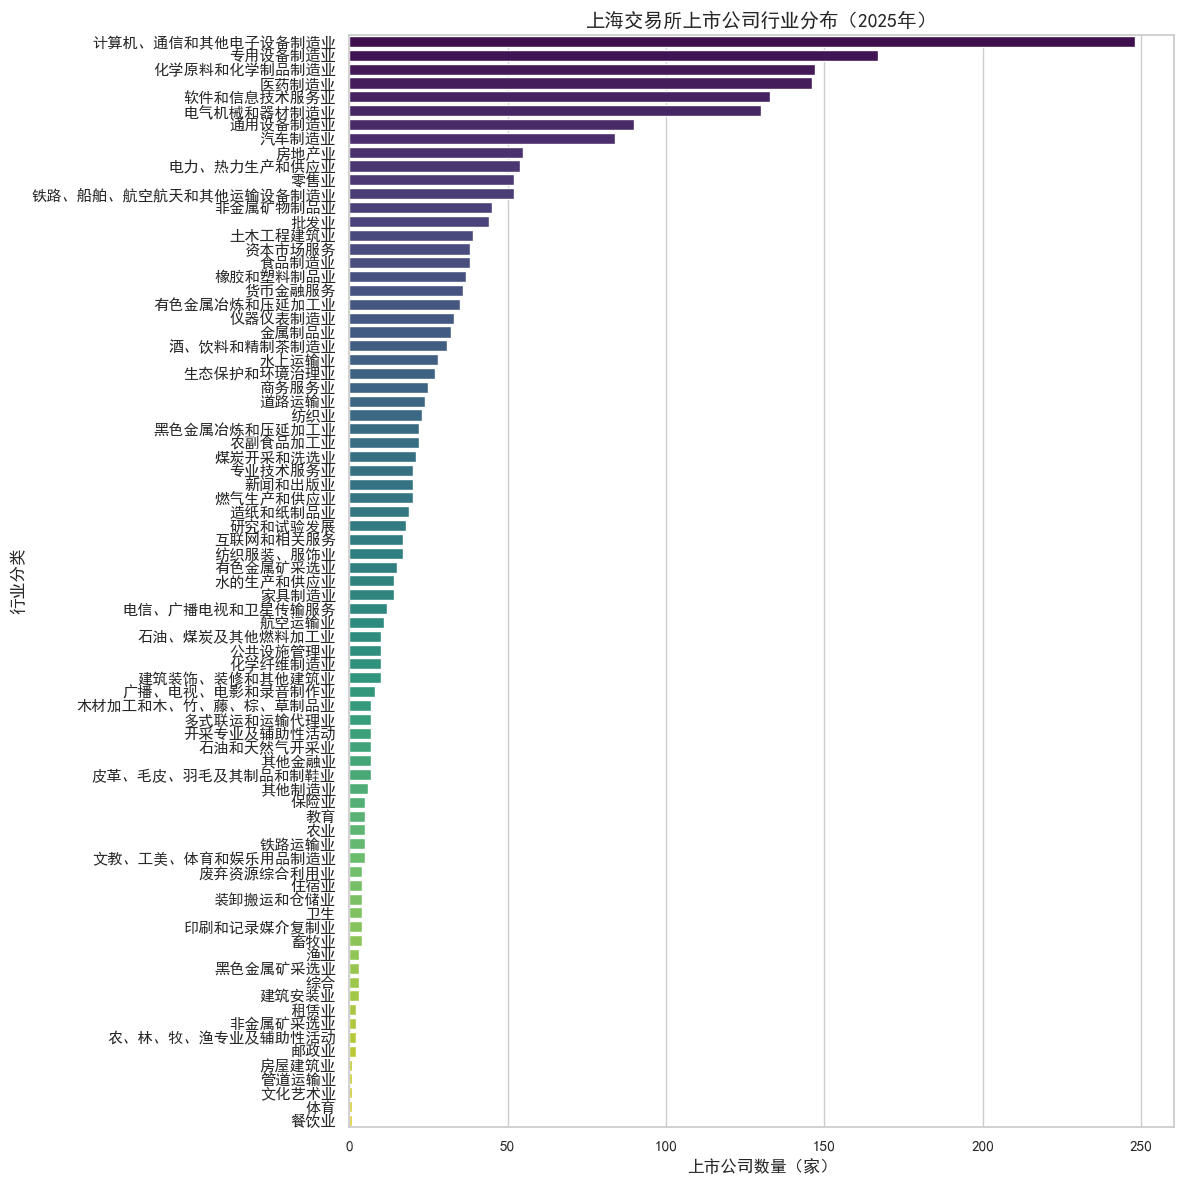


北交所行业分布：


C:\Users\xiaor\AppData\Local\Temp\ipykernel_4016\1933422641.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='industry', x='count', data=data, palette='viridis')


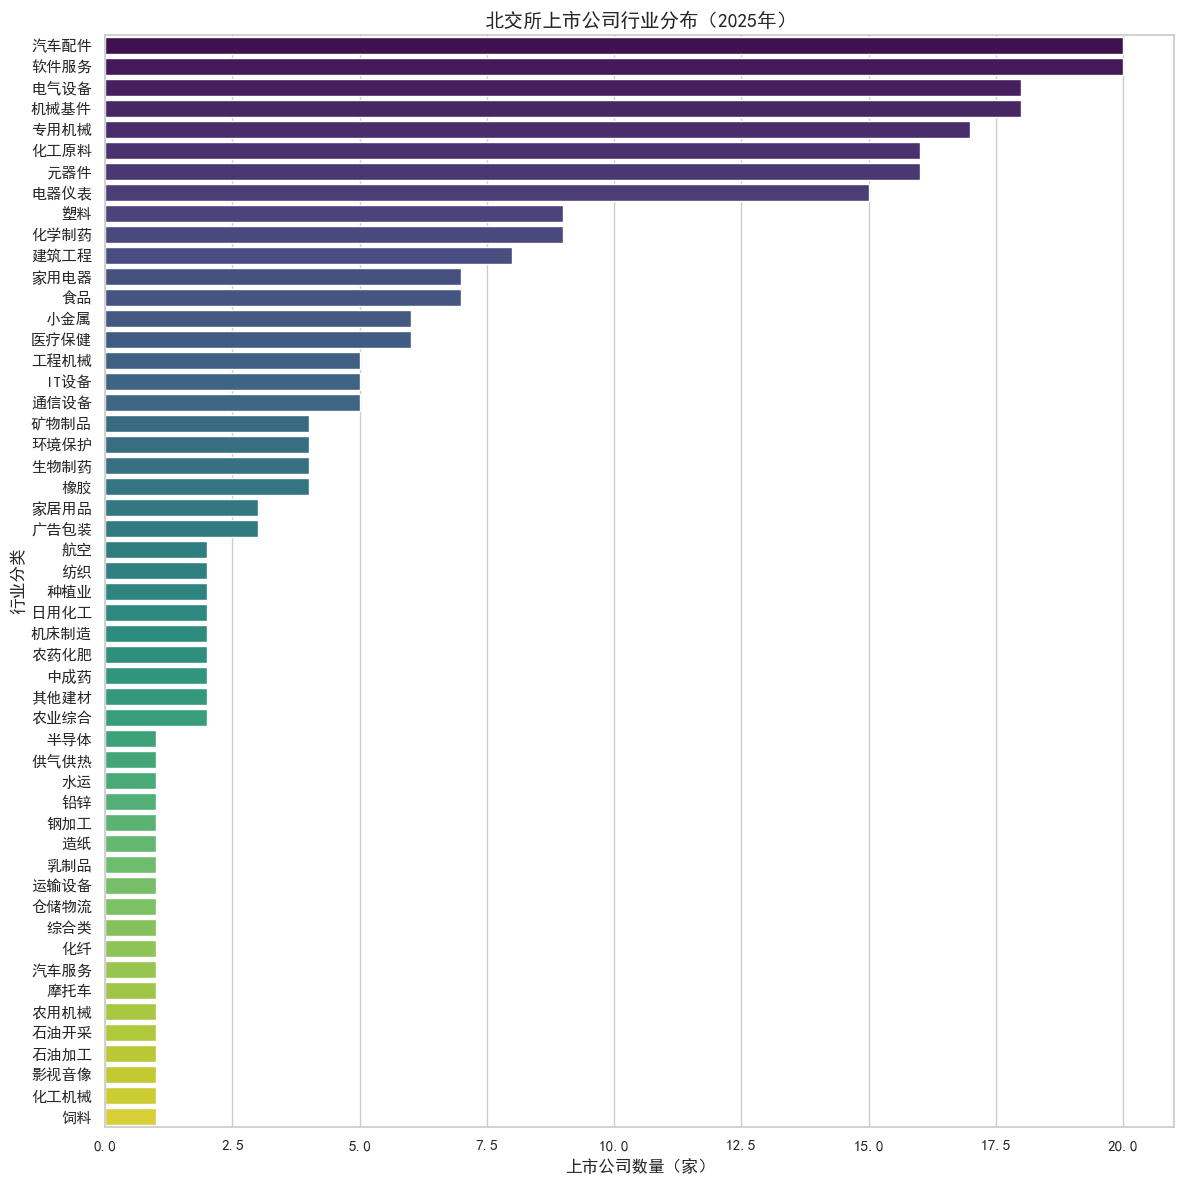


深圳交易所行业分布数据：
    行业名称  上市公司家数(家)
2    制造业       2002
8   信息技术        259
5   批发零售        101
12  科研服务         68
3   水电煤气         57
13  公共环保         56
11  商务服务         50
4    建筑业         50
10   房地产         45
9    金融业         37

上海交易所行业分布数据：
           CSRC_NAME  LIST_NUM
35  计算机、通信和其他电子设备制造业       248
31           专用设备制造业       167
22      化学原料和化学制品制造业       147
23             医药制造业       146
60        软件和信息技术服务业       133
34        电气机械和器材制造业       130
30           通用设备制造业        90
32             汽车制造业        84
65              房地产业        55
39       电力、热力生产和供应业        54

北交所行业分布数据：
  industry  count
0     汽车配件     20
1     软件服务     20
2     电气设备     18
3     机械基件     18
4     专用机械     17
5     化工原料     16
6      元器件     16
7     电器仪表     15
8       塑料      9
9     化学制药      9


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# =====================
# 数据处理部分
# =====================

# 深圳交易所处理（已有聚合数据）
sz_industry = industry_sz[['行业名称', '上市公司家数(家)']].sort_values('上市公司家数(家)', ascending=False)
sz_industry = sz_industry[sz_industry['行业名称'] != '总计'] 

# 上海交易所处理
industry_sh['trade_year'] = industry_sh['TRADE_DATE'].astype(str).str[:4]
latest_year_sh = industry_sh['trade_year'].max()
sh_industry = industry_sh[industry_sh['trade_year'] == latest_year_sh][['CSRC_NAME', 'LIST_NUM']].sort_values('LIST_NUM', ascending=False)
# 北交所处理
# 提取上市年份并筛选最新年度
industry_bj['list_year'] = industry_bj['list_date'].astype(str).str[:4]
latest_year_bj = industry_bj['list_year'].max()
bj_industry = pd.DataFrame(industry_bj.groupby(['industry'])['industry'].count().sort_values(ascending=False))
bj_industry.columns = ['count']
bj_industry = bj_industry.reset_index()
# =====================
# 可视化部分
# =====================

def plot_industry_distribution(data, title, xlabel):
    plt.figure(figsize=(12, 12))
    if isinstance(data, pd.DataFrame):
        if 'count' in data.columns:
            sns.barplot(y='industry', x='count', data=data, palette='viridis')
        else:
            sns.barplot(y=data.columns[0], x=data.columns[1], data=data, palette='viridis')
    plt.title(f'{title}（{latest_year_sh}年）', fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('行业分类', fontsize=12)
    plt.tight_layout()
    plt.show()

def process_top10(data, name_col='行业名称', count_col='上市公司家数(家)'):
    # 确保数据已排序
    data_sorted = data.sort_values(count_col, ascending=False).reset_index(drop=True)
    
    # 提取前10
    top10 = data_sorted.head(10).copy()
    
    # 计算其他类总和
    other_count = data_sorted[count_col][10:].sum()
    
    # 创建其他行
    other_row = pd.DataFrame({
        name_col: ['其他'],
        count_col: [other_count]
    })
    
    # 合并数据
    processed = pd.concat([top10, other_row], ignore_index=True)
    return processed

# 处理各交易所数据
sz_top10 = process_top10(sz_industry, '行业名称', '上市公司家数(家)')
sh_top10 = process_top10(sh_industry, 'CSRC_NAME', 'LIST_NUM').rename(
    columns={'CSRC_NAME':'行业名称', 'LIST_NUM':'公司数量'})
bj_top10 = process_top10(bj_industry, 'industry', 'count').rename(
    columns={'industry':'行业名称', 'count':'公司数量'})

# =====================
# 饼图可视化函数
# =====================
def plot_pie(data, title, year):
    plt.figure(figsize=(10, 10))
    
    # 准备数据
    labels = data.iloc[:, 0]
    sizes = data.iloc[:, 1]
    
    # 绘制饼图
    wedges, texts, autotexts = plt.pie(
        sizes, 
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.85,
        textprops={'fontsize':10}
    )
    
    # 美化标签
    plt.setp(autotexts, size=10, weight="bold")
    plt.title(f'{title}（{year}年）', fontsize=14, pad=20)
    
    # 添加中心空白
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gcf().gca().add_artist(centre_circle)
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# 绘制深圳饼图
print("\n深圳交易所行业分布（前10+其他）:")
plot_pie(sz_top10, '深圳交易所上市公司行业分布', latest_year_sh)

# 绘制上海饼图
print("\n上海交易所行业分布（前10+其他）:")
plot_pie(sh_top10, '上海交易所上市公司行业分布', latest_year_sh)

# 绘制北交所饼图
print("\n北交所行业分布（前10+其他）:")
plot_pie(bj_top10, '北交所上市公司行业分布', latest_year_bj)

# 输出处理后的数据
print("\n深圳前10+其他数据：")
print(sz_top10)

print("\n上海前10+其他数据：")
print(sh_top10)

print("\n北交所前10+其他数据：")
print(bj_top10)

    
    
# 绘制深圳交易所行业分布
print("深圳交易所行业分布：")
plot_industry_distribution(sz_industry, '深圳交易所上市公司行业分布', '上市公司数量（家）')

# 绘制上海交易所行业分布
print("\n上海交易所行业分布：")
plot_industry_distribution(sh_industry, '上海交易所上市公司行业分布', '上市公司数量（家）')

# 绘制北交所行业分布
print("\n北交所行业分布：")
plot_industry_distribution(bj_industry, '北交所上市公司行业分布', '上市公司数量（家）')

# =====================
# 数据表格输出
# =====================
print("\n深圳交易所行业分布数据：")
print(sz_industry.head(10))

print("\n上海交易所行业分布数据：")
print(sh_industry.head(10))

print("\n北交所行业分布数据：")
print(bj_industry.head(10))